# Introduction
Vandelay Industries has collected some data about people that visit their online store. The data includes basic information about shoppers such as their country, age, how many pages they visited during a session, if they are a new or returning user, which marketing channel they entered the site through, and whether or not they made a purchase (converted).

## Goal
Given this information, our task is to predict conversion rate, and make recommendations to the product team and the marketing team on ways to improve conversion rate.

Reference for Imbalanced Classification Problems
* https://www.kaggle.com/code/marcinrutecki/best-techniques-and-metrics-for-imbalanced-dataset#2.-Metrics-for-imbalanced-data


Enviroment Settings

In [ ]:
# Print every output from a specific cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Change to the current location (ref: https://webapps.stackexchange.com/questions/170886/copy-the-path-of-a-file-in-google-drive)
import os
os.chdir('/content/drive/MyDrive/1 - Study Hard/Softwares and Coding/Python_ML/Dataset')
!pwd

/content/drive/MyDrive/1 - Study Hard/Softwares and Coding/Python_ML/Dataset


# Data Loading and Data EDA

The prelimary checking include: data shape, feature types, missings, and duplicates

Note that the Train-Test split is conducted before data EDA work to avoid information leakage.

The following aspects of the **training** data are inspected in data EDA:
* Outliers
* Feature distributions and relationships
* Target variable distributions and relationship with features
* Determine NULL imputation, Feature transformation (not relevant for this project), and Categorical encoding strategies.

(Also see [review notes](https://docs.google.com/document/d/1VXMx5DDTd5swkjsrfxFfaLugXbpOgL6Xcx_3hiimd88/edit?pli=1#heading=h.h6qh6x82dha)
 for other EDA codes)



**Data EDA Conclusions**
* The target variable ('converted') is a binary variable and it is highly imbalanced. This suggests that we apply binary classification models with imbalanced data handling techniques.
* There is no missing data.
* There is one outlier with "age = 111"
* There is no significant feature correlation exist.
* The two numerical features (age and total_pages_visited) have higher impact on the convertion rate than the categorical features.
  * The lower age group is more likely to converge than the higher age group. Almost all the converted users are younger than 60 years old.
  * The higher total_page_visited group is more likely to converge than the lower total_page_visited group. Almost all the converted users have visited at least 10 pages. The most impactful range of total_page_visited is between 10 and 20. The conversion rate curve flats on both ends.
  * There is no stong correlation between the categorical features and the
target variable



In [ ]:
# Import relevant modules and load data file
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
%matplotlib inline

## Data Loading

In [ ]:
inputfilename = "conversion_data.csv"
data = pd.read_csv(inputfilename)

## Check Data Shape and Type

In [ ]:
data.shape
data.info() # target var: converted

(316200, 6)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 316200 entries, 0 to 316199
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   country              316200 non-null  object
 1   age                  316200 non-null  int64 
 2   new_user             316200 non-null  int64 
 3   source               316200 non-null  object
 4   total_pages_visited  316200 non-null  int64 
 5   converted            316200 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 14.5+ MB


In [ ]:
data.head()

,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0
1,US,23,1,Seo,5,0
2,US,28,1,Seo,4,0
3,China,39,1,Seo,5,0
4,US,30,1,Seo,6,0


In [ ]:
# Check feature number of unique values (features with a single value will be removed)
data.nunique(axis=0)

country                 4
age                    60
new_user                2
source                  3
total_pages_visited    29
converted               2
dtype: int64

## Check Missing Data

In [ ]:
data.isnull().sum() # No missing data

country                0
age                    0
new_user               0
source                 0
total_pages_visited    0
converted              0
dtype: int64

## Check Duplicated Data

In [ ]:
data.duplicated().sum() # duplicated rows exist but there is no id column in the dataset, so duplicates are expected

299903

## Check Target Variable Distribution
To determine the train-test split strategy

In [ ]:
target_var = "converted"	# select target variable
data[target_var].value_counts(normalize = True) # target variable is highly imbalanced

converted
0    0.967742
1    0.032258
Name: proportion, dtype: float64

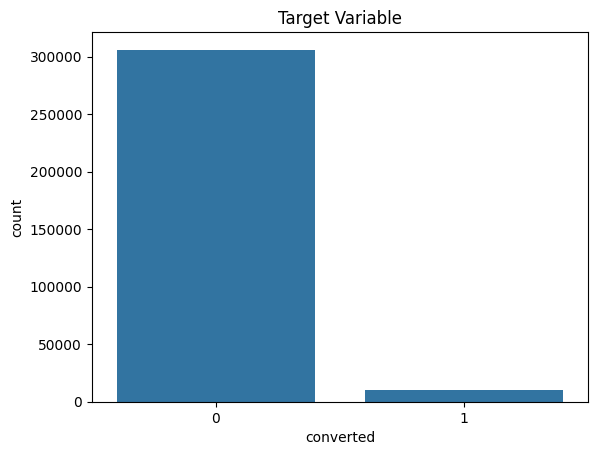

In [ ]:
sns.countplot(x=target_var, data=data)
plt.title("Target Variable");

## Train-Test Split

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(data.loc[:, data.columns != target_var], data[target_var],
                                                    test_size = 0.3, random_state = 0, stratify=data[target_var]) # specify “stratify = y” since the target variable is highly imbalanced


In [ ]:
x_train.shape
x_test.shape

(221340, 5)

(94860, 5)

In [ ]:
train_df =  x_train
train_df[target_var] = y_train
train_df = train_df.reset_index(drop=True)
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 221340 entries, 0 to 221339
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   country              221340 non-null  object
 1   age                  221340 non-null  int64 
 2   new_user             221340 non-null  int64 
 3   source               221340 non-null  object
 4   total_pages_visited  221340 non-null  int64 
 5   converted            221340 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 10.1+ MB


In [ ]:
test_df =  x_test
test_df[target_var] = y_test
test_df = test_df.reset_index(drop=True)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94860 entries, 0 to 94859
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   country              94860 non-null  object
 1   age                  94860 non-null  int64 
 2   new_user             94860 non-null  int64 
 3   source               94860 non-null  object
 4   total_pages_visited  94860 non-null  int64 
 5   converted            94860 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 4.3+ MB


In [ ]:
train_df.describe()
# No obvious outlier based on data range (tough max age 111 is suspicious)
# The overall conversion rate is 3.2%

,age,new_user,total_pages_visited,converted
count,221340.000000,221340.000000,221340.000000,221340.000000
mean,30.565858,0.685181,4.873832,0.032258
std,8.260033,0.464445,3.338465,0.176685
min,17.000000,0.000000,1.000000,0.000000
25%,24.000000,0.000000,2.000000,0.000000
50%,30.000000,1.000000,4.000000,0.000000
75%,36.000000,1.000000,7.000000,0.000000
max,111.000000,1.000000,29.000000,1.000000


## Feature Distributions

In [ ]:
train_df['new_user'] = train_df['new_user'].astype('object')  # convert 'new_user' to object datatype
test_df['new_user'] = test_df['new_user'].astype('object')

In [ ]:
num_vars = list(train_df.loc[:, train_df.columns != target_var].select_dtypes(exclude = ['object']).columns)	# select non-object variable names
cat_vars = list(train_df.loc[:, train_df.columns != target_var].select_dtypes(include = ['object']).columns)	# select object variable names

In [ ]:
num_vars
cat_vars

['age', 'total_pages_visited']

['country', 'new_user', 'source']

### Numerical Features Distributions and Relationships
The following aspects of the data are studied in this section:
* Numerical feature densities
* Numerical features' pairwise relationships: scatter plot, Pearson/Spearman correlation coefficients

#### Outlier Detection
**Conclusion**: The pairwise plot below shows that there is one obvious outlier with "age = 111"

Note that,
* here we are looking for multi-dimensional outliers, which can better detect outliers than one-dimensional outliers. Outliers can be within the range of each single variable but not within the hypersphere spanned by the majority of the data points.
* Outlier detection can be a multi-iteration task. We may miss some outliers during the initial data EDA stage but discover them at later stages when we conduct ML model evaluations or ML model interpretations. This is completely normal.



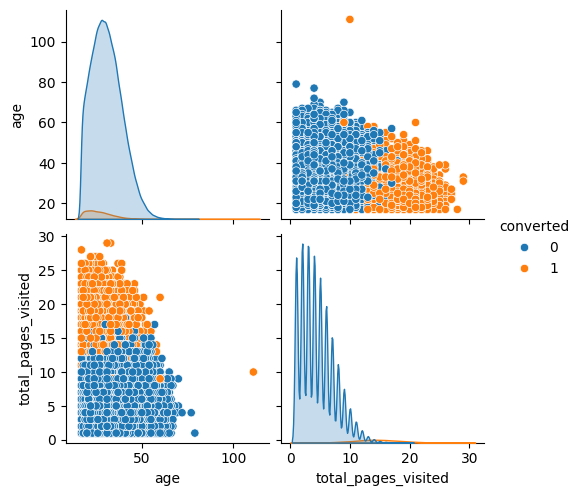

In [ ]:
# pd.plotting.scatter_matrix(train_df[num_vars])
sns.pairplot(train_df, vars = num_vars, hue = target_var);

In [ ]:
train_df[train_df['age'] == 111]  # No specific findings on this data point. Should be safe to delete.

,country,age,new_user,source,total_pages_visited,converted
177484,UK,111,0,Ads,10,1


Drop the outlier with "age = 111"

In [ ]:
train_df = train_df[train_df['age'] != 111]

Re-draw the pairwise plot without the outlier.


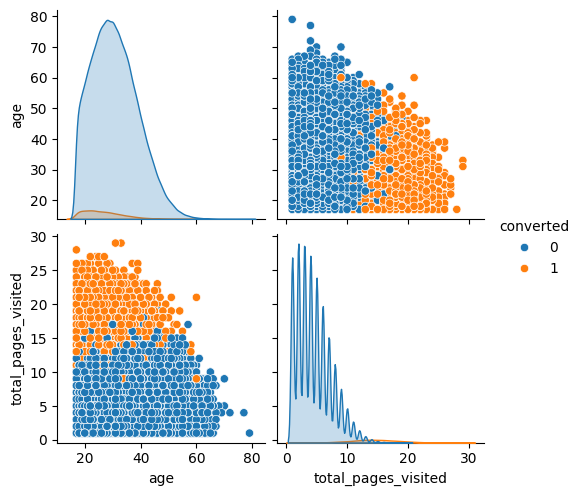

In [ ]:
sns.pairplot(train_df, vars = num_vars, hue = target_var);

**Conclusion**
* The distributions of age and total_pages_visited are both skewed to the right (as expected). And they are negatively correlated.
* There is a clear relationship between the total_pages_visited and the target variable ("converted") - almost all the converted users are with the  total_pages_visited >= 10.
* Similarily, for age v.s. converted - almost all the converted users are with the age <= 60.

Let's then compute both the pearson correlation coefficient (measures linear relationship) and spearman correlation coefficient (measures monotonic relationship) to see if they are strongly correlated.

**Conclusion**: It turns out that their correlation is actually weak (<0.4).

In [ ]:
train_df[num_vars].corr(method='pearson')

,age,total_pages_visited
age,1.000000,-0.044792
total_pages_visited,-0.044792,1.000000


In [ ]:
train_df[num_vars].corr(method='spearman')

,age,total_pages_visited
age,1.000000,-0.024356
total_pages_visited,-0.024356,1.000000


### Categorical Features Distributions and Relationships
The following aspects of the data are studied in this section:
* Categorical features' frequency tables
* Categorical features' pairwise relationships: contingency tables, Chi-squared independence test

In [ ]:
cat_vars

['country', 'new_user', 'source']

In [ ]:
for c in cat_vars:
  train_df[c].value_counts(normalize = True)
  print('----------------')

country
US         0.562775
China      0.242908
UK         0.153199
Germany    0.041118
Name: proportion, dtype: float64

----------------


new_user
1    0.685184
0    0.314816
Name: proportion, dtype: float64

----------------


source
Seo       0.490049
Ads       0.281193
Direct    0.228758
Name: proportion, dtype: float64

----------------


<Axes: xlabel='country'>

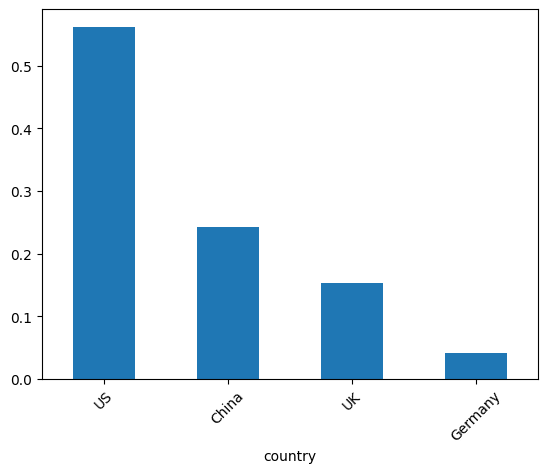

<Axes: xlabel='new_user'>

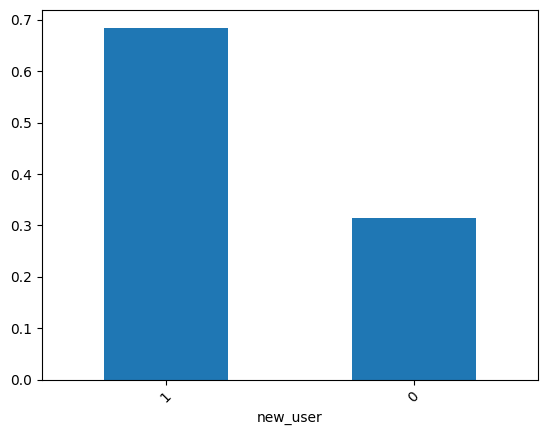

<Axes: xlabel='source'>

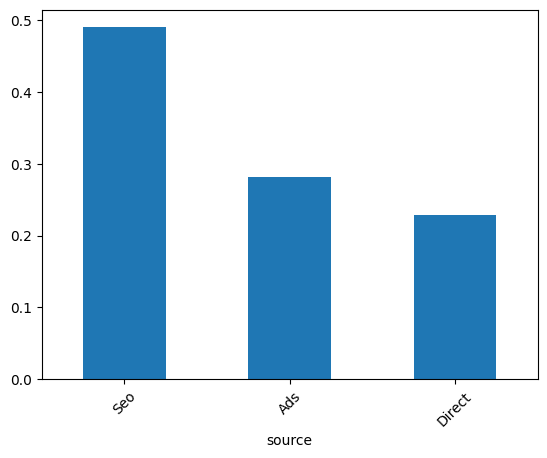

In [ ]:
for cv in cat_vars:
    train_df[cv].value_counts(normalize=True).plot(kind="bar", rot = 45)
    plt.show()

In [ ]:
from scipy.stats import chi2_contingency

# Defining a function to perform the Chi-Square Test and interpret results
def cat_var_pairwise_relationship(data, col1, col2):
    # Creating a contingency table
    contingency_table = pd.crosstab(data[col1], data[col2], normalize = 'index')

    # Performing the Chi-Square Test
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    p = np.round(p,2)

    # Interpreting the result
    significant = p < 0.05  # 5% significance level

    return contingency_table, p, significant

In [ ]:
from itertools import combinations
pairs = list(combinations(cat_vars, 2))
for v1, v2 in pairs:
  cat_var_pairwise_relationship(train_df, v1, v2)
  print('----------------')

(new_user         0         1
 country                     
 China     0.301869  0.698131
 Germany   0.321503  0.678497
 UK        0.322274  0.677726
 US        0.317885  0.682115,
 1.0,
 False)

----------------


(source        Ads    Direct       Seo
 country                              
 China    0.282600  0.227062  0.490338
 Germany  0.293594  0.216899  0.489507
 UK       0.279896  0.229644  0.490460
 US       0.280033  0.230115  0.489853,
 1.0,
 False)

----------------


(source         Ads    Direct       Seo
 new_user                              
 0         0.279933  0.227680  0.492387
 1         0.281772  0.229253  0.488975,
 1.0,
 False)

----------------


**Conclusion**: Results showed that none of the categorical variable pairs is significantly correlated.

### Numerical Features v.s. Categorical Features Relationships
The following aspects of the data are studied in this section:
* Numerical feature distributions (in boxplot) by levels of categorical features
* *If necessary, we can also perform statistical tests (z/t-test; ANOVA) to get the corresponding statistical significance

<Axes: title={'center': 'age'}, xlabel='country'>

Text(0.5, 1.0, 'Boxplot of age grouped by country')

Text(0.5, 0.98, '')

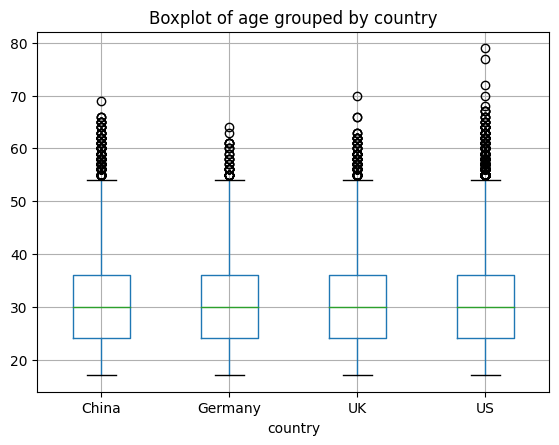

<Axes: title={'center': 'age'}, xlabel='new_user'>

Text(0.5, 1.0, 'Boxplot of age grouped by new_user')

Text(0.5, 0.98, '')

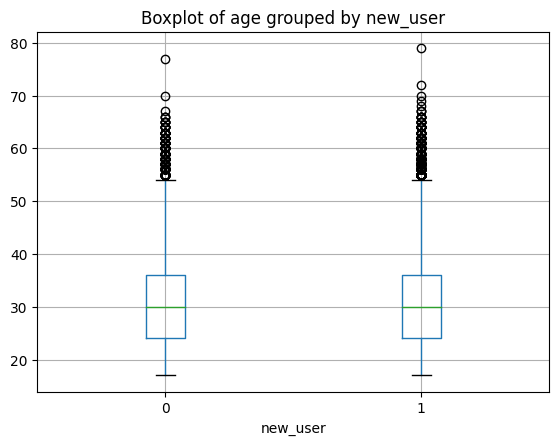

<Axes: title={'center': 'age'}, xlabel='source'>

Text(0.5, 1.0, 'Boxplot of age grouped by source')

Text(0.5, 0.98, '')

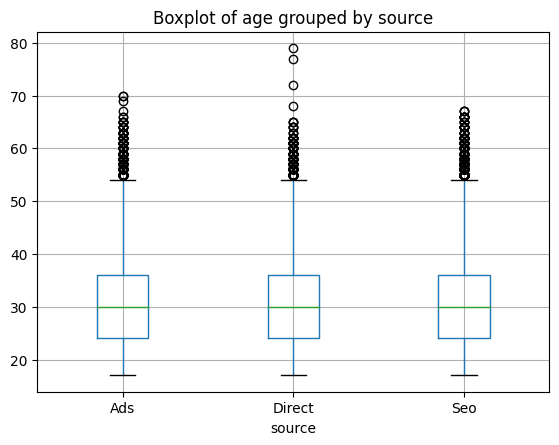

<Axes: title={'center': 'total_pages_visited'}, xlabel='country'>

Text(0.5, 1.0, 'Boxplot of total_pages_visited grouped by country')

Text(0.5, 0.98, '')

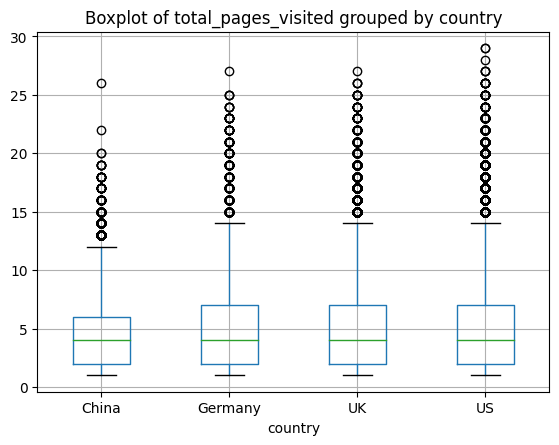

<Axes: title={'center': 'total_pages_visited'}, xlabel='new_user'>

Text(0.5, 1.0, 'Boxplot of total_pages_visited grouped by new_user')

Text(0.5, 0.98, '')

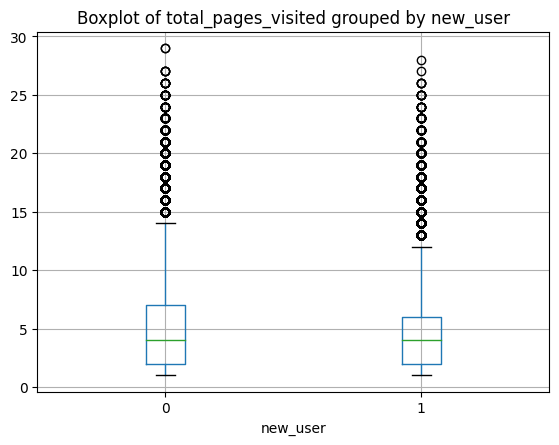

<Axes: title={'center': 'total_pages_visited'}, xlabel='source'>

Text(0.5, 1.0, 'Boxplot of total_pages_visited grouped by source')

Text(0.5, 0.98, '')

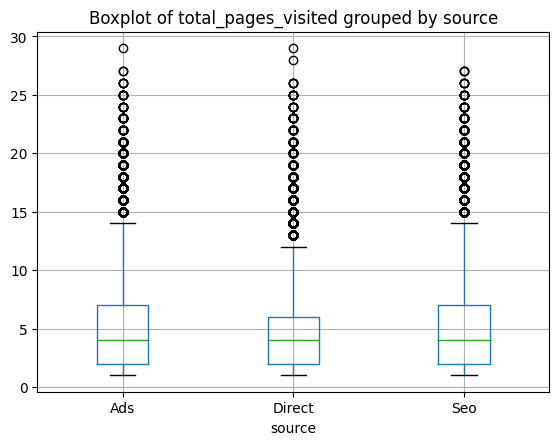

In [ ]:
import matplotlib.pyplot as plt

for nv in num_vars:
  for cv in cat_vars:
    train_df.boxplot(column = nv, by = cv)
    plt.title(f'Boxplot of {nv} grouped by {cv}')
    plt.suptitle('')  # turn off the default title
    plt.show()



**Conclusion**: We can see that overall the boxplots by different levels are pretty similar, which indicates that there is no strong relationship between numerical features and categorical features

### Features v.s. Target Variable Relationships

<Axes: title={'center': 'age'}, xlabel='converted'>

Text(0.5, 1.0, 'Boxplot of age grouped by source')

Text(0.5, 0.98, '')

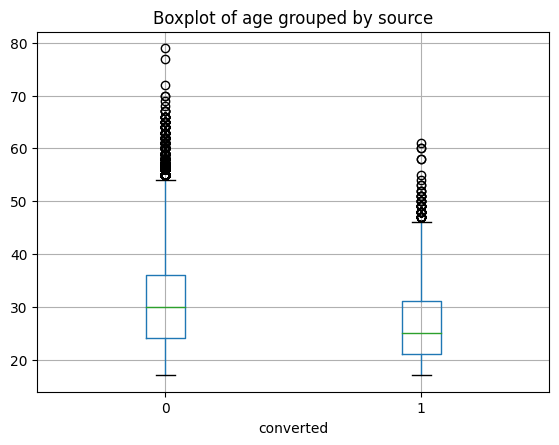

<Axes: title={'center': 'total_pages_visited'}, xlabel='converted'>

Text(0.5, 1.0, 'Boxplot of total_pages_visited grouped by source')

Text(0.5, 0.98, '')

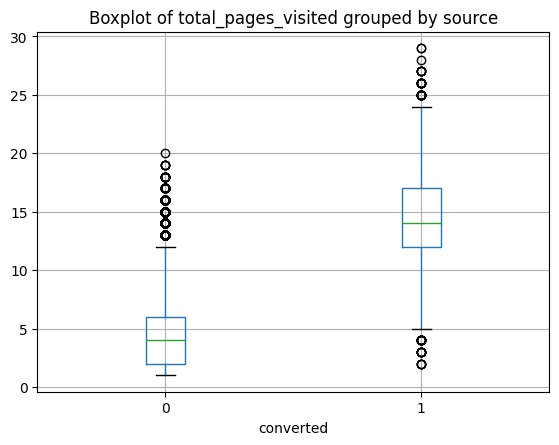

In [ ]:
for nv in num_vars:
    train_df.boxplot(column = nv, by = target_var)
    plt.title(f'Boxplot of {nv} grouped by {cv}')
    plt.suptitle('')  # turn off the default title
    plt.show()

<Axes: xlabel='age'>

Text(0.5, 1.0, 'converted by age')

Text(0, 0.5, 'converted Rate')

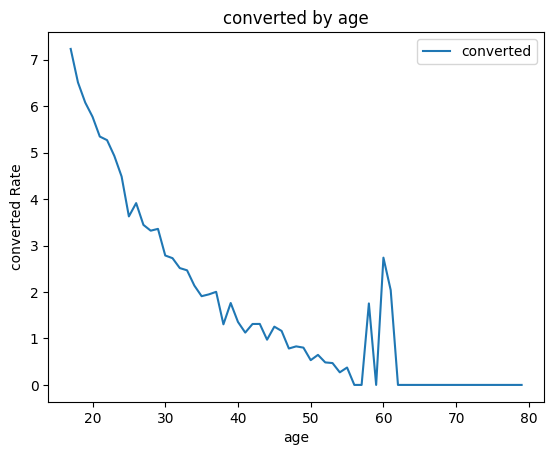

In [ ]:
# convertion rate vs. age
grp_cvr = train_df.groupby(num_vars[0],as_index = False)[target_var].mean()
grp_cvr[target_var] *= 100
grp_cvr.plot(x = num_vars[0], y = target_var)
plt.title(f'{target_var} by {num_vars[0]}')
plt.ylabel(f'{target_var} Rate')

<Axes: xlabel='total_pages_visited'>

Text(0.5, 1.0, 'converted by total_pages_visited')

Text(0, 0.5, 'converted Rate')

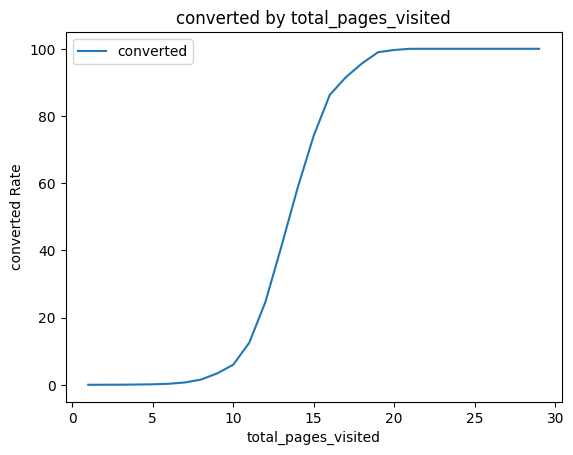

In [ ]:
# convertion rate vs. total_pages_visited
grp_cvr = train_df.groupby(num_vars[1],as_index = False)[target_var].mean()
grp_cvr[target_var] *= 100
grp_cvr.plot(x = num_vars[1], y = target_var)
plt.title(f'{target_var} by {num_vars[1]}')
plt.ylabel(f'{target_var} Rate')

In [ ]:
for cv in cat_vars:
  cat_var_pairwise_relationship(train_df, cv, target_var)
  print('----------------')

(converted         0         1
 country                      
 China      0.998810  0.001190
 Germany    0.937919  0.062081
 UK         0.947507  0.052493
 US         0.962028  0.037972,
 1.0,
 False)

----------------


(converted         0         1
 new_user                     
 0          0.927843  0.072157
 1          0.986081  0.013919,
 1.0,
 False)

----------------


(converted         0         1
 source                       
 Ads        0.965263  0.034737
 Direct     0.971876  0.028124
 Seo        0.967243  0.032757,
 1.0,
 False)

----------------


**Conclusion**:
* Conversion rate tends to decrease by age. And close to zero if age > 60.
* Conversion rate tends to increase by total_page_visited. And the most impactful range of total_page_visited is [10, 20]. Curve flats on both ends.
* There is no stong relationship between the categorical features and the target variable


# Modeling
For this conversion rate prediction problem, we will fit three binary classification models, namely, Logistic Regression, Random Forest, and XGBoost.
* For each model, we will apply grid search cross-validation on the training data to select the optimal set of hyperparameters.
* Each model will then be trained on the entire training dataset using these optimal hyperparameters.
* The model with the best performance will be selected as the final model.
* Finally, the selected model will be evaluated on the testing dataset to assess its generalization performance.

Due to the target variable is imbalanced, we will use the F1-score as the model selection criteria. (Theoretically, the AUC of the precision-recall curve is a better metric but it is not as robust as the F1-score)


In [ ]:
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import confusion_matrix, classification_report
from imblearn.metrics import classification_report_imbalanced

## Preprocessing
Below, we apply
* one-hot encoding on the categorical features
* standarization on numerical features (helps the fitting algorithm converge faster).

In [ ]:
# Both OneHotEncoder and LabelBinarizer generate errors...
# Will just use get_dummies to generate one-hot encodings
# pd.get_dummies() will automately detect categorical variables and apply one-hot encodings on them. Thus, can pass the entire dataset to it.

train_df_pp = pd.get_dummies(train_df, dtype = int)
test_df_pp = pd.get_dummies(test_df, dtype = int)

In [ ]:
sc = StandardScaler()
train_df_pp[num_vars] = sc.fit_transform(train_df_pp[num_vars])
test_df_pp[num_vars] = sc.transform(test_df_pp[num_vars])

In [ ]:
X_train = train_df_pp.loc[:, train_df_pp.columns != target_var]
y_train = train_df_pp[target_var]

X_test = test_df_pp.loc[:, test_df_pp.columns != target_var]
y_test = test_df_pp[target_var]

In [ ]:
# Code below doesn't work...

# from sklearn.compose import ColumnTransformer
# from sklearn.preprocessing import StandardScaler,OneHotEncoder

# preprocessor = ColumnTransformer([
#     ('num', StandardScaler(), num_vars)
#     ,('cat', OneHotEncoder(), cat_vars)
# ], remainder = 'passthrough')

# train_df_pp = preprocessor.fit_transform(train_df)
# test_df_pp = preprocessor.transform(test_df)

In [ ]:
def training_pipeline(X_train, y_train, estimator, param, metric = 'average_precision', cv = 5, refit = True, return_train_score = True):
  gs = GridSearchCV(estimator = estimator,
                      param_grid = param,
                      scoring = metric,
                      cv = cv, # automately apply StratifiedKFold
                      refit = refit,
                      return_train_score = return_train_score)
  gs.fit(X_train, y_train)

  res = {}


  res['fitted_model'] = gs.best_estimator_

  # Best set of hyperparameters
  res['best_params_'] = gs.best_params_

  # For logistic regression, also return the fitted coefficient under the best set of hyperparameters
  if 'LogisticRegression' in str(estimator):
    fitted_gs = gs.best_estimator_
    fitted_coef = {list(X_train.columns)[i]: np.round(fitted_gs.coef_[0][i],2) for i in range(len(list(X_train.columns)))}
    fitted_coef['intercept'] = np.round(fitted_gs.intercept_[0], 2)
    res['fitted_coef'] = fitted_coef

  # Mean cross-validated score of the best_estimator
  res['best_score'] = gs.best_score_

  # The refit score of the best_estimator
  res['best_training_score'] = gs.score(X_train, y_train)

  return res


## Logistic Regression

In [ ]:
# LogisticRegressionCV() Yield the same result as GridSearchCV()

In [ ]:
lr_est = LogisticRegression(random_state = 0,
                            C = 5,
                            penalty = 'l2',
                            tol = 0.0001,
                            max_iter = 100,
                            class_weight = None,
                            solver='lbfgs')

lr_param = {'C': np.power(10.0, np.arange(-4, 5, 1))}

lr_res = training_pipeline(X_train, y_train, lr_est, lr_param, metric = 'f1')

In [ ]:
# The best C value
lr_res['best_params_']

{'tol': 1e-05}

In [ ]:
lr_res['best_score']

0.76298117852857

In [ ]:
lr_res['best_training_score']

0.7626356589147287

In [ ]:
# precision, recall, specificity, f1-score, geometric mean, and index balanced accuracy of the geometric mean.
ytrain_pred = lr_res['fitted_model'].predict(X_train)
print(classification_report_imbalanced(y_true = y_train, y_pred = ytrain_pred)) # Should look at the result of class 1

                   pre       rec       spe        f1       geo       iba       sup

          0       0.99      1.00      0.69      0.99      0.83      0.71    214200
          1       0.85      0.69      1.00      0.76      0.83      0.67      7139

avg / total       0.99      0.99      0.70      0.99      0.83      0.71    221339



In [ ]:
lr_res['fitted_coef']

{'age': -0.62,
 'total_pages_visited': 2.54,
 'country_China': -2.69,
 'country_Germany': 1.12,
 'country_UK': 0.97,
 'country_US': 0.61,
 'new_user_0': 0.88,
 'new_user_1': -0.88,
 'source_Ads': 0.08,
 'source_Direct': -0.12,
 'source_Seo': 0.04,
 'intercept': -7.23}

Model Evaluation on Test Set

In [ ]:
# The model selection metric value under the fitted model
# lr_res['fitted_model'].score(X_test, y_test)

In [ ]:
# precision, recall, specificity, f1-score, geometric mean, and index balanced accuracy of the geometric mean.
ytest_pred = lr_res['fitted_model'].predict(X_test)
print(classification_report_imbalanced(y_true = y_test, y_pred = ytest_pred)) # Should look at the result of class 1

                   pre       rec       spe        f1       geo       iba       sup

          0       0.99      1.00      0.69      0.99      0.83      0.71     91800
          1       0.86      0.69      1.00      0.76      0.83      0.66      3060

avg / total       0.99      0.99      0.70      0.99      0.83      0.70     94860



In [ ]:
# Confusion matrix
print(confusion_matrix(y_test, ytest_pred))

## *SVM
SVM trains slower than the other models. Won't generate results in reasonable amount of time. Will pass.

In [ ]:
# param_svm = {'C': [1, 10, 100] # np.power(10.0, np.arange(-3, 4, 1))
#             # ,'kernel': ['poly', 'rbf', 'sigmoid']
#              }

# gs_svm = GridSearchCV(estimator = SVC(random_state = 0,
#                                       #max_iter = 100,
#                                       class_weight = None,
#                                       verbose = 2), # penalty is L2
#                       param_grid = param_svm,
#                       scoring = 'average_precision',
#                       cv=5, # automately apply StratifiedKFold
#                       refit = True,
#                       return_train_score = True,
#                       )

# gs_svm.fit(X_train, y_train)

[LibSVM]

KeyboardInterrupt: 

## Random Forest

In [ ]:
rf_est = RandomForestClassifier(random_state = 0,
                                n_estimators = 100, # number of trees in the forest. Increasing doesn't yield a better res
                                max_depth = None, # default is None
                                criterion = 'entropy',
                                max_features = 'sqrt',
                                min_samples_split = 2, # default is 2
                                min_samples_leaf = 1, # default is 1
                                ccp_alpha = 0 # pruning parameter， higher value prunes deeper. Tuning doesn't yield a better res
                                )

rf_param = {
    # 'ccp_alpha': [0, 0.1, 1]
}

rf_res = training_pipeline(X_train, y_train, rf_est, rf_param, metric = 'f1')

In [ ]:
rf_res['best_params_']

{'ccp_alpha': 0}

In [ ]:
rf_res['best_score']

0.7327782462034476

In [ ]:
rf_res['best_training_score']

0.8033517835178352

Note that the fitted_model below is the best fitted model from CV. Not the best fitted model on the entire training dataset.

In [ ]:
# precision, recall, specificity, f1-score, geometric mean, and index balanced accuracy of the geometric mean.
ytrain_pred = rf_res['fitted_model'].predict(X_train)
print(classification_report_imbalanced(y_true = y_train, y_pred = ytrain_pred)) # Should look at the result of class 1

                   pre       rec       spe        f1       geo       iba       sup

          0       0.99      1.00      0.73      0.99      0.85      0.75    214200
          1       0.89      0.73      1.00      0.80      0.85      0.71      7139

avg / total       0.99      0.99      0.74      0.99      0.85      0.75    221339



<Axes: xlabel='feature_imp', ylabel='feature'>

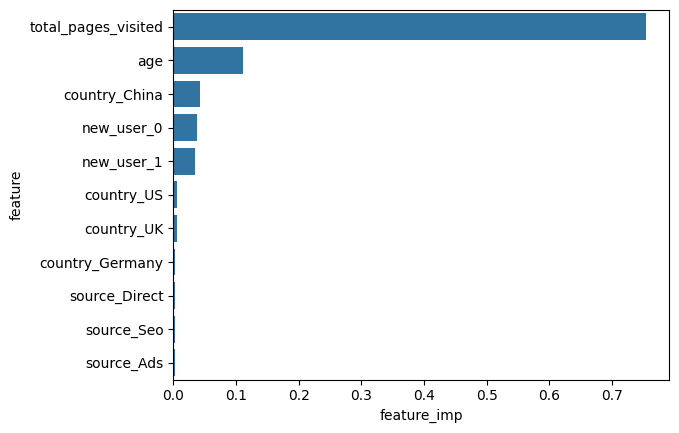

In [ ]:
# The feature importance here is Gini importance: (normalized) total reduction of the criterion brought by that feature.
# Since the features are not highly correlated, feature importances can be correctly interpreted.

imp = rf_res['fitted_model'].feature_importances_
imp_df = pd.DataFrame({'feature_imp': imp, 'feature': list(X_train.columns)}).sort_values(by = ['feature_imp'], ascending = False)
sns.barplot(x = imp_df['feature_imp'], y = imp_df['feature'])

## XGBoost
Tuning reference: https://www.analyticsvidhya.com/blog/2016/03/complete-guide-parameter-tuning-xgboost-with-codes-python/

[API](https://xgboost.readthedocs.io/en/latest/python/python_api.html#module-xgboost.sklearn)
* First tune: **max_depth** and **min_child_weight** have the highest impact on the performance
* Then tune: regularization parameters: **reg_lambda, alpha, colsample_bytree, subsample**
* Last tune: tune learning rate, **eta** and **n_estimators** with the rest of the hyperparameter fixed at their best values

In [ ]:
xgb_est = xgb.XGBClassifier(random_state = 0,
                            objective = 'binary:logistic',
                            use_label_encoder = False,
                            verbosity = 2,
                            n_estimators = 100,
                            max_depth = 4,  # default = 6
                            min_child_weight = 20,
                            reg_lambda = 6, # L2 regularization para
                            alpha = 0.01, # L1 regularization para, default = 0. Not using here since feature dim is not high
                            colsample_bytree = 0.8,  # feature random sampling fraction for each tree
                            subsample = 0.8, # data random sampling fraction for each tree
                            eta = 0.1, # learning_rate/step size shrinkage
                           importance_type = 'gain'
                            )


xgb_param = {

        #   'eta': [0.01, 0.1, 0.2]

      }

xgb_res = training_pipeline(X_train, y_train, xgb_est, xgb_param, metric = 'f1')


In [ ]:
xgb_res['best_params_']

{}

In [ ]:
xgb_res['best_score']

0.7656121284037213

In [ ]:
xgb_res['best_training_score']

0.7669865642994241

In [ ]:
# precision, recall, specificity, f1-score, geometric mean, and index balanced accuracy of the geometric mean.
ytrain_pred = xgb_res['fitted_model'].predict(X_train)
print(classification_report_imbalanced(y_true = y_train, y_pred = ytrain_pred)) # Should look at the result of class 1

                   pre       rec       spe        f1       geo       iba       sup

          0       0.99      1.00      0.70      0.99      0.83      0.72    214200
          1       0.85      0.70      1.00      0.77      0.83      0.68      7139

avg / total       0.99      0.99      0.71      0.99      0.83      0.72    221339



<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

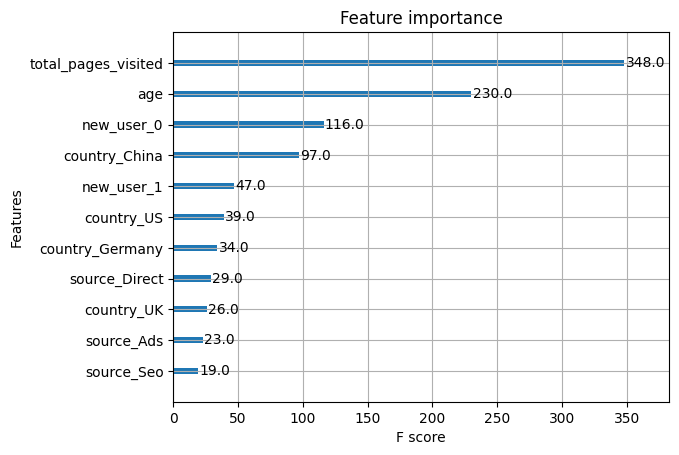

In [ ]:
# xgb_res['fitted_model'].feature_importances_
xgb.plot_importance(xgb_res['fitted_model'])


## *Modeling with Upsampling Technique
Note that undersampling/oversampling shouldn't be done before CV because it will cause a "data leakage" problem.

This [reference](https://www.kaggle.com/code/marcinrutecki/best-techniques-and-metrics-for-imbalanced-dataset#9.-SMOTE-(Synthetic-Minority-Oversampling-Technique) shows that up/under-sampling doesn't help improving the performance, neither does class-weighting in sklearn ML methods.

## Test Performance Evaluation

Based on 5-fold CV on training data with performance metric as F1-score. The performance of Logistic Regression, Random Forest, and XGBoost are
* Logistic Regression: 0.76
* Random Forest: 0.8
* XGBoost: 0.77

Thus, the best model is Random Forest. We then evaluate its performance on the testing dataset to see its generalization performance.

In [ ]:
# Fit the best model on the entire training dataset
best_model = RandomForestClassifier(random_state = 0,
                                n_estimators = 100, # number of trees in the forest. Increasing doesn't yield a better res
                                max_depth = None, # default is None
                                criterion = 'entropy',
                                max_features = 'sqrt',
                                min_samples_split = 2, # default is 2
                                min_samples_leaf = 1, # default is 1
                                ccp_alpha = 0 # pruning parameter， higher value prunes deeper. Tuning doesn't yield a better res
                                )

best_model.fit(X_train, y_train)

RandomForestClassifier(ccp_alpha=0, criterion='entropy', random_state=0)

In [ ]:
# precision, recall, specificity, f1-score, geometric mean, and index balanced accuracy of the geometric mean.
ytest_pred = best_model.predict(X_test)
print(classification_report_imbalanced(y_true = y_test, y_pred = ytest_pred))

                   pre       rec       spe        f1       geo       iba       sup

          0       0.99      0.99      0.67      0.99      0.81      0.68     91800
          1       0.82      0.67      0.99      0.73      0.81      0.64      3060

avg / total       0.98      0.98      0.68      0.98      0.81      0.68     94860



The F1-score of Random Forest on the testing dataset is 0.73, which is slightly less than that on the training dataset. This is as expected and indicates the model is well-tuned.

## Findings
* The Random Forest model actually performs better than XGBoost for this problem, with the best F1-score on the testing data being just 0.73. Plus, our EDA results showed that none of the categorical variables have significant correlation with the target variable.
* All the evidence suggest that we are lacking important features that would help the model achieve better performance. In other words, the noise-to-signal ratio is high, which leads to the mediocre performance of XGBoost.
* Thus, one of the important future work would be feature engineering. Candidate features can be: geo-location, employment, education, gender, device, number of times a user visited the pricing page, temporal features, engagement features (e.g. scroll depth, session duration, bounce rate), product-related features, historical reviews, etc.

# Model Interpretation
[API](https://shap-lrjball.readthedocs.io/en/latest/generated/shap.TreeExplainer.html)

[Reference](https://shap-lrjball.readthedocs.io/en/latest/example_notebooks/tree_explainer/Census%20income%20classification%20with%20XGBoost.html)

[Reference 2](https://medium.com/analytics-vidhya/shap-part-3-tree-shap-3af9bcd7cd9b)

* The feature importance under the trained model itself is unstable. The SHAP method is a better and more robust model interpretation method.
* Here we interpret the best model - Random Forest - using SHAP.

Note that SHAP values compute slowly, and we need to pass the entire training data to TreeExplainer.

In [ ]:
pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.1/540.1 kB 7.3 MB/s eta 0:00:00


In [ ]:
import shap

In [ ]:
# Generate a sample set of the training data with sampling weight = cvr*I(not_converted) + (1-cvr)*I(converted)
data_interp = X_train.copy()
data_interp[target_var] = y_train

cvr = np.round(data_interp[data_interp[target_var] == 1].shape[0]/data_interp.shape[0], 4)
wt = np.where(data_interp[target_var] == 1, 1 - cvr, cvr)
data_interp_sample = data_interp.sample(n = 1000, random_state = 0, weights = wt)

In [ ]:
data_interp_sample.describe() # conversion rate ~ 50% in the sample set

,age,total_pages_visited,country_China,country_Germany,country_UK,country_US,new_user_0,new_user_1,source_Ads,source_Direct,source_Seo,converted
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,-0.193563,1.359971,0.154000,0.071000,0.186000,0.589000,0.519000,0.481000,0.302000,0.228000,0.470000,0.487000
std,0.981640,1.828322,0.361129,0.256953,0.389301,0.492261,0.499889,0.499889,0.459355,0.419753,0.499349,0.500081
min,-1.642657,-1.160362,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.916112,-0.261741,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-0.310658,1.235961,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.415887,2.733663,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000
max,4.290794,5.729068,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# create the display data with unscaled continuous features
# We get shap values based on the data (scaled) used to train the model, but when drawing the plots, we use the display_data(unscaled).

data_display = pd.merge(data_interp_sample, train_df, left_index = True, right_index = True)
data_display[num_vars] = data_display[[x+'_y' for x in num_vars]]
data_display = data_display.loc[:,~ data_display.columns.str.contains('_x|_y')]
data_display = data_display.drop(cat_vars, axis = 1)

In [ ]:
# Drop target var
data_interp_sample = data_interp_sample.drop(target_var, axis = 1)
data_display = data_display.drop(target_var, axis = 1)

In [ ]:
# For classification problems, explainer.shap_values() return a list of size n_classes.
# Each object of this list is an array of size [n_samples, n_features] and corresponds to the SHAP values for the respective class.
# In this example, shap_values[1] is the SHAP values for the positive class & shap_values[0] is the SHAP values for the negative class.

explainer = shap.TreeExplainer(best_model)
shap_values = explainer.shap_values(data_interp_sample, check_additivity = False)

## Global Interpretation
Due to the size of the training data and the computational intensity of SHAP values, we conduct the 'global' interpretation on the sampled training data.

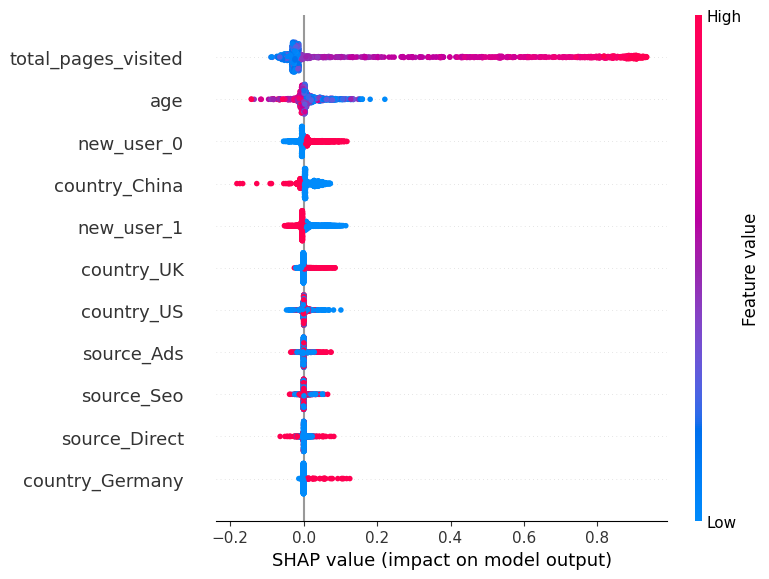

In [ ]:
shap.summary_plot(shap_values[:,:,1], features = data_interp_sample)

The top features aligns with the feature importance from the Random Forest model, but the SHAP summary plot is more informative since it shows the direction of the impact along with the spread of the SHAP value of each single data point.

In [ ]:
data_display[num_vars].describe()

,age,total_pages_visited
count,1000.000000,1000.000000
mean,28.967000,9.414000
std,8.106641,6.103758
min,17.000000,1.000000
25%,23.000000,4.000000
50%,28.000000,9.000000
75%,34.000000,14.000000
max,66.000000,24.000000


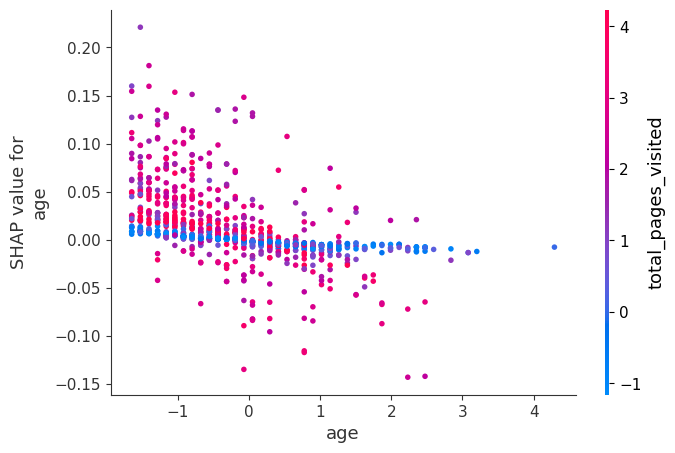

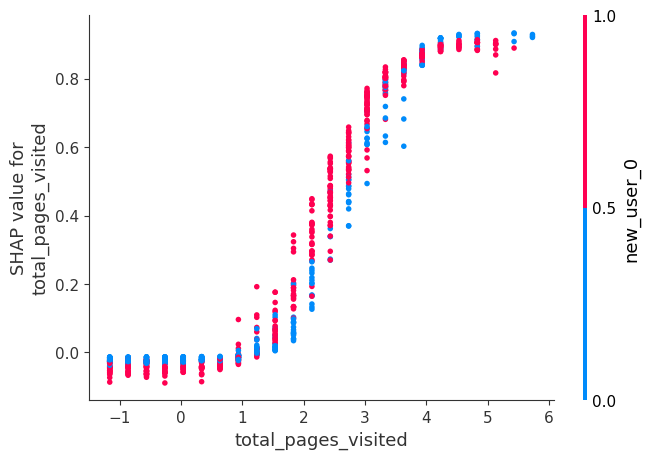

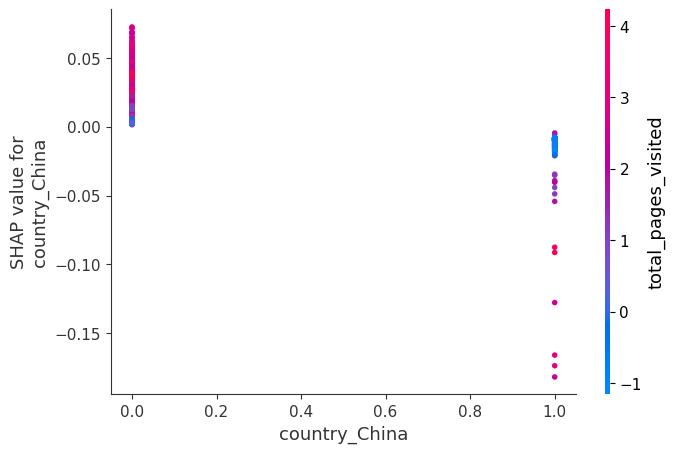

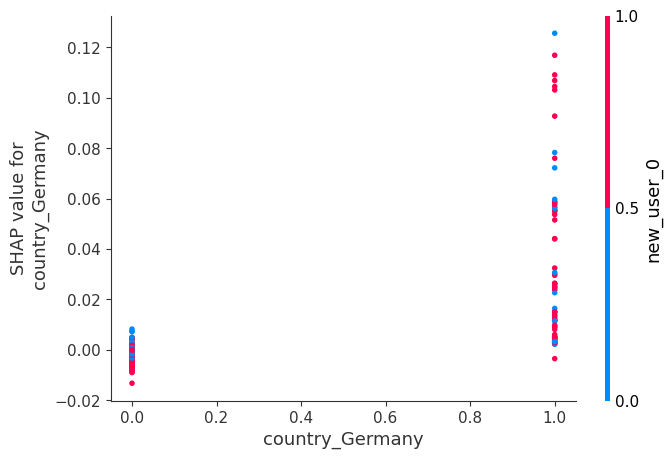

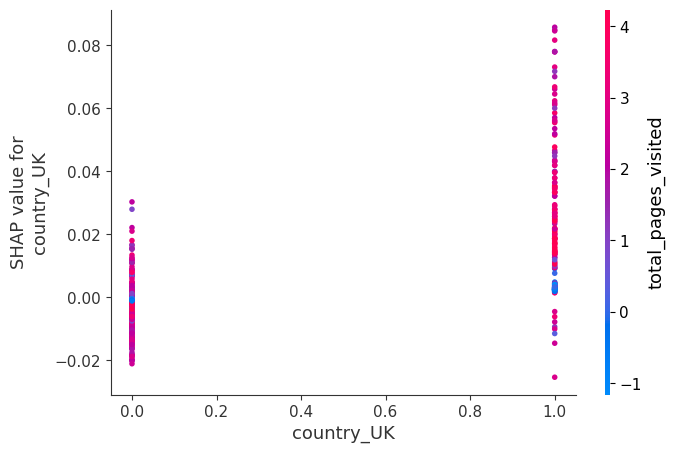

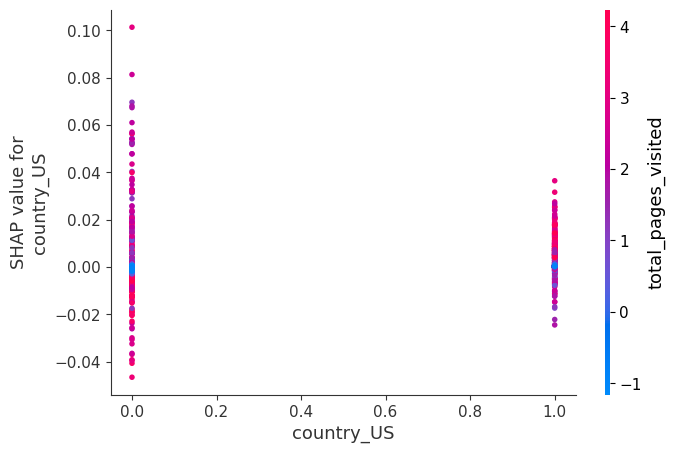

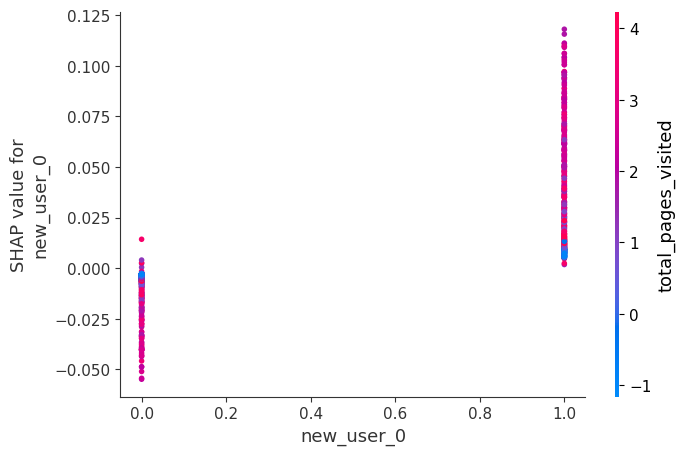

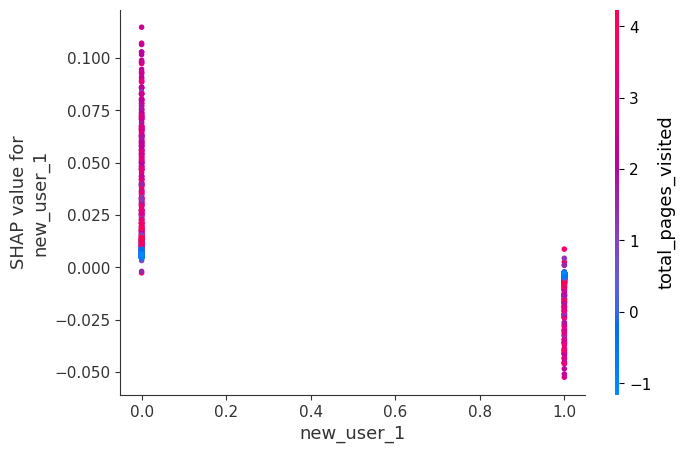

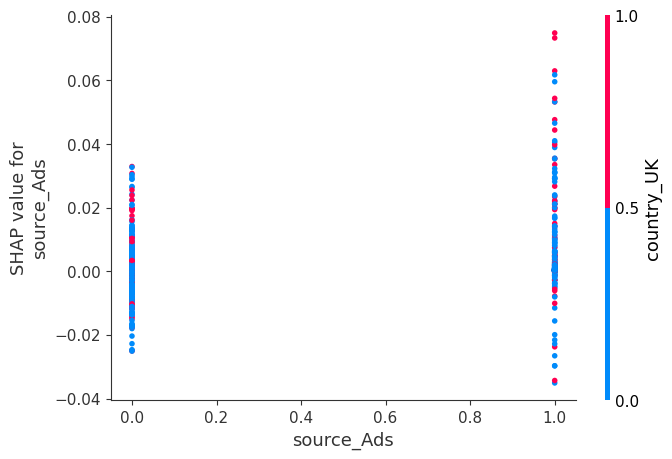

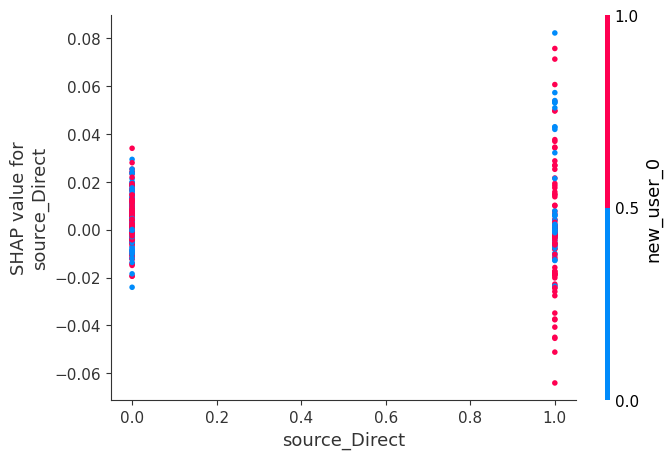

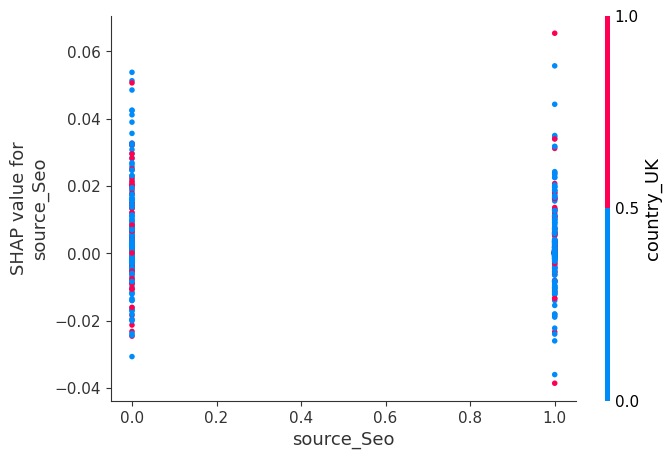

In [ ]:
# SHAP Dependence Plots
# similar to partial dependence plots, but account for the feature interaction effects, and are only defined in regions of the input space
# supported by data. The vertical dispersion of SHAP values at a single feature value is driven by interaction effects.

# Not sure why it isn't displaying the original feature scales ...
for name in data_interp_sample.columns:
    shap.dependence_plot(name, shap_values[:,:,1], features =  data_interp_sample, display_features = data_display )

The dependence plot shows interesting patterns of feature interactive impacts on conversion rate.
* age v.s. total_page_visited
* total_page_visited v.s. old_user
* China v.s. total_page_visited

## Local Interpretation

### Visualize a single prediction
* explainer.expected_value[1] means that we are focusing on the convertion rate not non-conversion rate
* shap_values[i][:,1] show the force plot of the ith observation focusing on the convertion rate

In [ ]:
shap.initjs() # print the JS visualization code to the notebook
obs_ind = 0
shap.plots.force(explainer.expected_value[1], shap_values[obs_ind][:,1], features = data_display.iloc[obs_ind,:])

In [ ]:
shap.initjs()
obs_ind = 1
shap.plots.force(explainer.expected_value[1], shap_values[obs_ind][:,1], features = data_display.iloc[obs_ind,:])

## Visualize multiple predictions

In [ ]:
shap.initjs() # print the JS visualization code to the notebook
shap.plots.force(explainer.expected_value[1], shap_values[:,:,1], features = data_display)

We can see that there are clearly three clusters among the sampled customers. One future work can be to study these three customer clusters and develop different marketing strategies.

# *Experimental Design

# Insights and Recommendations

As we can see from the SHAP summary plot
* The total_pages_visited has the highest impact on the conversion rate, and the impact is positive. In other words, a higher number of pages visited is associated with a higher conversion rate.
* age, China, and new_user have negative impact on conversion rate.

  **Recommendation**
  * Old (existing) users have better conversion rate. We should keep touch with them, for example, send promotion email or coupons to old users. Or encourage them to purchase membership to further engage with the business.
* UK and source_ADs have positive impact on conversion rate. Germany also has positive impact but the impact is weak.

  **Recommendation**
  * Conversion from Germany is good, but there aren't many users from Germany. This presents a significant opportunity for us to target German users. For example, we could increase our advertising efforts in Germany.
* US, source_Seo, and source_Direct have mixed impact on conversion rate.

  **Recommendation**
  * This indicates that we need more relevant features in these three areas to extract clearer, rather than mixed, relationships with the target variable. e.g. finer US geo-locations.

We can also draw the following insights from the SHAP dependence plot
* For lower age group (age < 30), higher total_pages_visited generate higher conversion rate. While for higher age group, this trend is not obvious, and even tends to reverse as the age gets higher.
* From data EDA, we also learnt that the most impactful range of total_page_visited is between 10 and 20. The conversion rate curve flats on both ends.
  
  **Recommendation**:
  * For lower age group who have visited less than 10 pages, our goal is to encourage them to visit more than 10 pages. For example, through recommendations, "you might also like", "customers brought this also brought", etc. If we find some users browse a lot and didn't buy anything, we can send email to remaind them. However, if they have visited more than 20 pages, we don't need to put much effort on encouraging them to visited more pages. Instead, we can focus on helping them make quick decisions to converge. For example, through similar deals comparison, top reviews, key words in reviews, coupons, etc.
  * For higher age group, our goal is mainly helping them to make decisions faster no matter how many pages they have visited.
  * Strengthen marketing on lower age group. Investigate other marketing strategies on higher age group.
  * For customers older than 60, the marketing priority is low.
* There is also a mixed interpretation for total_pages_visited v.s. existing_users (new_users_0)
* For chinese customers, higher total_pages_visited generate lower conversion rate, while for the other countries' customers higher total_pages_visited generate higher conversion rate.

  **Recommendation**:
  * Considering China's economic and population, there is a huge opportunity if we target Chinese users and improve their conversion rate based on their preference - fast decision. We can adopt the similar strategy as the higher_age_group. We should also consider other aspects, such as expand Chinese products, improving Chinese translation quality, and satisfy Chinese users' culture better.






# Future Works

* **Feature Engineering**: Based on the best model performance and the SHAP feature importance analysis, it is evident that we need additional significant features to improve conversion rate predictions and provide more informative model interpretations. Therefore, an important area of future work will be feature engineering. Potential candidate features include geo-location, employment, education, gender, device, the number of times a user visited the pricing page, temporal features, engagement features (e.g., scroll depth, session duration, bounce rate), product-related features, and historical reviews.
* **Customer clustering**: The multi-sample SHAP force plot inspired us to conduct clustering based on SHAP values to better understand customer conversion behaviors and to more effectively target customers.
* **Try other performance metrics**: Since false negative (wrongly classify a customer with high conversion rate to the low_conversion_rate group) is more costly, we can try F2-score as the model performance metric.
